# Herding and Preferential Attachment 

<b> With equal Probability</b>

In [6]:
#With equal probability 
import math, random
import scipy, pylab 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

graph_dict = {}# dictionary 
total_Nodes = 10000# total number of vertices
edges = 0

for i in range(total_Nodes):
    graph_dict[i] = []  
    #selecting node to whom to connect, with equal probability 
    x=random.choice(list(graph_dict.keys()))
    graph_dict[x].append(i)

# calculating degree distribution
degrees = [len(node) for node in graph_dict.values()]


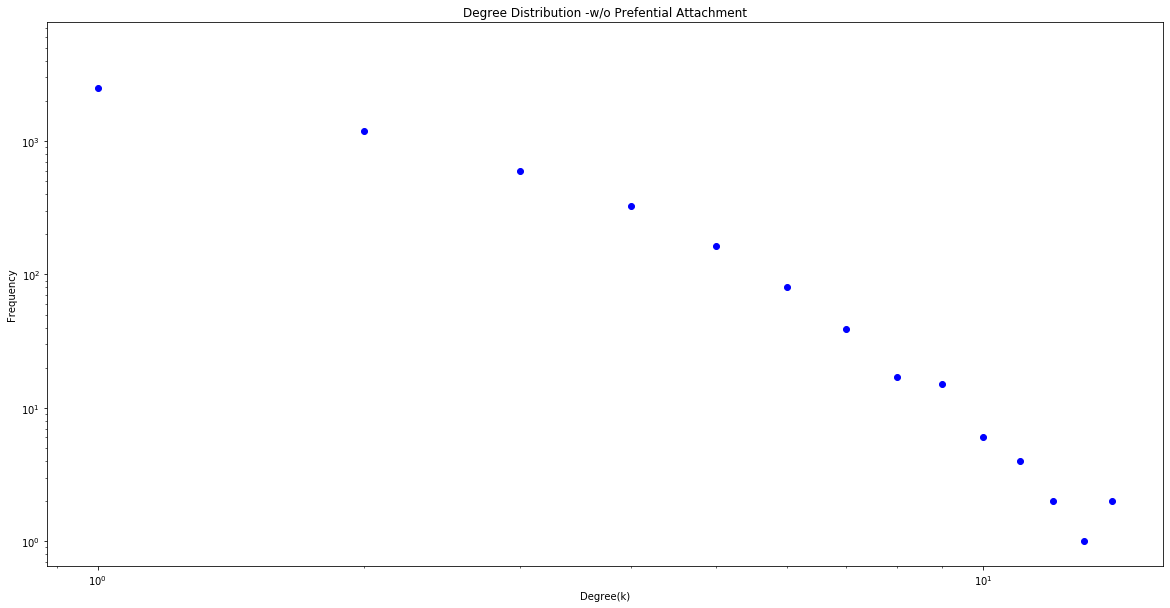

In [7]:
#plotting degree distributions
import pandas as pd 
degree_DF= pd.DataFrame(degrees)
degree_DF.columns=['degree']
degree_freq_prob_E=degree_DF.groupby('degree').size().reset_index(name='size')
plt.figure(figsize=(20,10))
plt.loglog(degree_freq_prob_E['degree'],degree_freq_prob_E['size'],marker='o',ls='',c='blue')
plt.ylabel('Frequency')
plt.xlabel('Degree(k)')
plt.title("Degree Distribution -w/o Prefential Attachment")
plt.show()
#calculating probability distribution 
degree_freq_prob_E['prob']=degree_freq_prob_E['size']/np.sum(degree_freq_prob_E['size'])
# degree_freq_prob_E

<b> With Probability p(i) proportional to degreee </b>

In [8]:
#with Prefential attachment 
graph_dict = {}# dictionary 
total_Nodes = 10000# total number of vertices
edges = 0

for i in range(total_Nodes):
    graph_dict[i] = []      
    for node in graph_dict.values():
        #calculating probability of the nodes with respect to their degrees
        connect_Probability = 1.0 / (edges + i + 1) * (len(node) + 1)
        if(random.random() <= connect_Probability):
            node.append(i)
            edges += 1

# calculating degree distribution
degrees = [len(node) for node in graph_dict.values()]
# print(degrees)


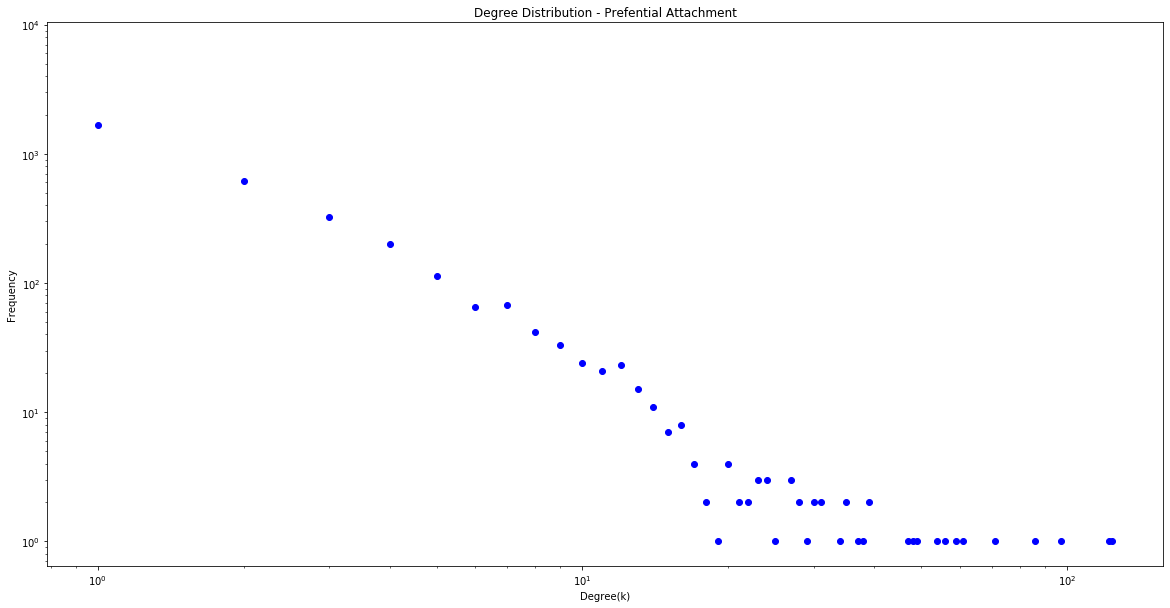

In [9]:
#plotting degree distribution
import pandas as pd 
degree_DF= pd.DataFrame(degrees)
degree_DF.columns=['degree']
degree_freq_prob_P=degree_DF.groupby('degree').size().reset_index(name='size')
plt.figure(figsize=(20,10))
plt.loglog(degree_freq_prob_P['degree'],degree_freq_prob_P['size'],marker='o',ls='',c="blue")
plt.ylabel('Frequency')
plt.xlabel('Degree(k)')
plt.title("Degree Distribution - Prefential Attachment")
plt.show()
degree_freq_prob_P['prob']=degree_freq_prob_P['size']/np.sum(degree_freq_prob_P['size'])


<b>Write your own function to calculate the entropy of a (discrete) probability distribution (with base 2), 
and apply it to both degree distributions in the previous task.</b>

In [11]:
#function for entropy calculation
def Entropy_Calc(df,column):#dataframe and column name 
    entropy_calc=np.sum(df[column]*np.log2(1/df[column]))
    return entropy_calc

In [12]:
#entropy for equal probability 
entropy_calc_E= Entropy_Calc(degree_freq_prob_E,'prob')
print("Entropy for equal probability is:",entropy_calc_E)

Entropy for equal probability is: 1.9989786049014995


In [13]:
#entropy with prefential attachment 
entropy_calc_P=Entropy_Calc(degree_freq_prob_P,'prob')
print("Entropy for equal probability is:",entropy_calc_P)

Entropy for equal probability is: 1.7514884345857067


In [14]:
#just for verification
from scipy.stats import entropy
entropy(degree_freq_prob_P['prob'], base=2)

1.7514884345857065

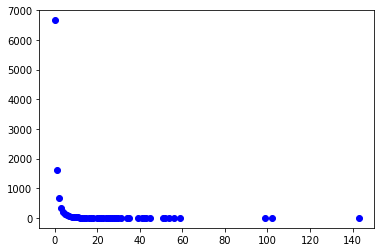

In [15]:
#just to check normal scale axes plot.
plt.plot(degree_freq_prob_P['degree'],degree_freq_prob_P['size'],marker='o',ls='',c="blue")

In [22]:

# l1 norm of a vector
from numpy import array
from numpy.linalg import norm
a = array([0,1, 2, 3,4,5,6])
print(a)
l1 = norm(a, 1)
print(l1)

[0 1 2 3 4 5 6]
21.0
